## Project: Analyze Employee Exit Surveys

### Introduction

In this project, I'll be working with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

You can find the [DETE exit survey data here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)

The TAFE survey is no longer available for download. 

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? 
* What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

They want us to combine the results for both surveys to answer these questions.


#### Lets start with importing and exploring the datasets:

In [243]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

print (dete_survey.info())
print (dete_survey.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [244]:
print(dete_survey.isnull().sum())

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [245]:
print (dete_survey['Aboriginal'].value_counts())
print ()
print (dete_survey['Business Unit'].value_counts())

Yes    16
Name: Aboriginal, dtype: int64

Education Queensland                          54
Information and Technologies                  26
Training and Tertiary Education Queensland    12
Other                                         11
Human Resources                                6
Corporate Strategy and Peformance              5
Early Childhood Education and Care             3
Policy, Research, Legislation                  2
Infrastructure                                 2
Corporate Procurement                          1
Finance                                        1
Pacific Pines SHS                              1
Calliope State School                          1
Indigenous Education and Training Futures      1
Name: Business Unit, dtype: int64


In [246]:
print (dete_survey['Classification'].value_counts())

Primary              161
Secondary            124
A01-A04               66
AO5-AO7               46
Special Education     33
AO8 and Above         14
PO1-PO4                8
Middle                 3
Name: Classification, dtype: int64


#### Notes: 

As we can see the Dete Survey data is broken up into 53 columns and we have 822 entries. Looking at the aboriginal column I can see not many in the survey identifty as an aboriginal Australian or just alot of this data is just missing.

There is also alot of missing information in the classifcation type which is a system categorizing where the employee worked. 
If in primary school, special education, administation, etc. 

Lets take a look at the tafe survey. 

### Exploring Tafe Survey: 

In [247]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [248]:
pd.set_option('display.max_rows', None)
print (tafe_survey.shape)
print()
print(tafe_survey.isnull().sum())

(702, 72)

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265

In [249]:
print (tafe_survey.columns)

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

#### Notes: 

The Tafe survey has 72 columns and 702 entries. The Tafe survey is similar to the Dete Survey with similar columns such as employee classification, employment length, age, gender, etc . Also each dataset is very detailed on finding out why employees are leaving their employer. 

### Identify Missing Values and Drop Unnecessary Columns:

Now that I explored both data sets and familiarized myself with the data. I will start to do some housekeeping and clean the data sets a bit. I will drop the unnecessary columns that I wont be using.  I will also convert the non stated values in as NaN. 

In [250]:
dete_survey= pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [251]:
pd.reset_option("display.max_rows")
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
print(dete_survey_updated)

      ID                        SeparationType Cease Date  DETE Start Date  \
0      1                 Ill Health Retirement    08/2012           1984.0   
1      2      Voluntary Early Retirement (VER)    08/2012              NaN   
2      3      Voluntary Early Retirement (VER)    05/2012           2011.0   
3      4             Resignation-Other reasons    05/2012           2005.0   
4      5                        Age Retirement    05/2012           1970.0   
..   ...                                   ...        ...              ...   
817  819                        Age Retirement    02/2014           1977.0   
818  820                        Age Retirement    01/2014           1980.0   
819  821  Resignation-Move overseas/interstate    01/2014           2009.0   
820  822                 Ill Health Retirement    12/2013           2001.0   
821  823  Resignation-Move overseas/interstate    12/2013              NaN   

     Role Start Date                                      Posit

In [252]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
print(tafe_survey_updated)

        Record ID                              Institute  \
0    6.341330e+17  Southern Queensland Institute of TAFE   
1    6.341337e+17            Mount Isa Institute of TAFE   
2    6.341388e+17            Mount Isa Institute of TAFE   
3    6.341399e+17            Mount Isa Institute of TAFE   
4    6.341466e+17  Southern Queensland Institute of TAFE   
..            ...                                    ...   
697  6.350668e+17         Barrier Reef Institute of TAFE   
698  6.350677e+17  Southern Queensland Institute of TAFE   
699  6.350704e+17       Tropical North Institute of TAFE   
700  6.350712e+17      Southbank Institute of Technology   
701  6.350730e+17       Tropical North Institute of TAFE   

                     WorkArea  CESSATION YEAR Reason for ceasing employment  \
0    Non-Delivery (corporate)          2010.0              Contract Expired   
1    Non-Delivery (corporate)          2010.0                    Retirement   
2         Delivery (teaching)          201

In [253]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [254]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

#### Notes: 

Now that I have removed the columns I dont need we can clean up the column names. The reasoning to clean the column names is that I will eventually combine the 2 datasets. They share alot of the same information but just with different column names. 
So it will look more uniform and easier to work with when combined. 

### Clean Column Names:

In [255]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [256]:
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.replace(' ','_').str.lower()


In [257]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [258]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

In [259]:
new_columns = {'Record ID': 'id',
             'CESSATION YEAR': 'cease_date',
             'Reason for ceasing employment': 'separationtype',
             'Gender. What is your Gender?': 'gender', 
             'CurrentAge. Current Age':'age',
             'Employment Type. Employment Type': 'employment_status',
             'Classification. Classification': 'position',
             'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
             'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated = tafe_survey_updated.rename(new_columns, axis=1)

print(tafe_survey_updated.columns)
print(tafe_survey_updated.shape)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')
(702, 23)


### Filter the Data:

Now that we cleaned the column names. We will filter the data on separation type for each dataset. One of our main questions is to see why people are resigning? We are not really interested in retirements. 

In [260]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [261]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [262]:
dete_index = dete_survey_updated['separationtype'].str.contains('Resignation')
dete_resignations= dete_survey_updated[dete_index].copy()

print(dete_resignations['separationtype'].value_counts())
print(dete_resignations['separationtype'].value_counts().sum())

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64
311


In [263]:
tafe_index = tafe_survey_updated['separationtype']=='Resignation'
tafe_resignations= tafe_survey_updated[tafe_index].copy()

print(tafe_resignations['separationtype'].value_counts())

Resignation    340
Name: separationtype, dtype: int64


In [264]:
dete_other = dete_survey_updated['separationtype']=='Other'
dete_other_resignations= dete_survey_updated[dete_other].copy()

pd.set_option('display.max_columns', None)
dete_other_resignations
        

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
38,39,Other,2012,1998.0,1998.0,Teacher Aide,NaN,Metropolitan,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Female,51-55,NaN,NaN,NaN,NaN,NaN
52,53,Other,2012,1982.0,1983.0,Teacher,Secondary,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Female,61 or older,NaN,NaN,NaN,NaN,NaN
66,67,Other,2012,1969.0,2007.0,Teacher,Secondary,NaN,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN
67,68,Other,2012,NaN,NaN,Teacher Aide,NaN,Central Office,Education Queensland,Temporary Part-time,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,Female,26-30,NaN,NaN,NaN,NaN,NaN
149,150,Other,2012,2008.0,2008.0,Public Servant,A01-A04,Central Office,Training and Tertiary Education Queensland,Permanent Full-time,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,26-30,NaN,NaN,NaN,NaN,NaN
152,153,Other,2012,1993.0,2012.0,Public Servant,AO5-AO7,Central Office,Training and Tertiary Education Queensland,Permanent Full-time,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,Yes
156,157,Other,2012,2007.0,2010.0,Technical Officer,NaN,Central Office,Information and Technologies,Temporary Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,26-30,NaN,NaN,NaN,NaN,NaN
157,158,Other,2012,2009.0,2011.0,Public Servant,AO5-AO7,Central Office,Information and Technologies,Temporary Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,21-25,NaN,NaN,NaN,NaN,NaN
162,163,Other,2012,2007.0,2008.0,Public Servant,A01-A04,Metropolitan,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Female,36-40,NaN,NaN,NaN,NaN,NaN
166,167,Other,2012,1997.0,2005.0,Public Servant,AO5-AO7,Central Office,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Female,46-50,NaN,NaN,NaN,NaN,NaN


In [265]:
pd.reset_option("display.max_rows")

### Verify the Data:

I will look at few columns to make sure the data looks good and that there are no major issues. 
I specifically look at 'cease_date', 'dete_start_date', role_start_date, 'age'. 

In [266]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [267]:
dete_resignations[['dete_start_date', 'role_start_date','cease_date', 'age']].head(20)

,dete_start_date,role_start_date,cease_date,age
3,2005.0,2006.0,05/2012,36-40
5,1994.0,1997.0,05/2012,41-45
8,2009.0,2009.0,07/2012,31-35
9,1997.0,2008.0,2012,46-50
11,2009.0,2009.0,2012,31-35
12,1998.0,1998.0,2012,36-40
14,2007.0,2010.0,2012,31-35
16,NaN,NaN,2012,61 or older
20,1982.0,1982.0,2012,56-60
21,1980.0,2009.0,2012,51-55


In [268]:
dete_resignations[['dete_start_date', 'role_start_date','cease_date', 'age']].tail(20)

,dete_start_date,role_start_date,cease_date,age
774,2005.0,2005.0,NaN,41-45
784,2013.0,2013.0,10/2013,21-25
786,1994.0,2008.0,01/2014,41-45
788,1990.0,2010.0,NaN,41-45
789,1983.0,1999.0,01/2014,51-55
790,2008.0,2008.0,01/2014,36-40
791,2007.0,2007.0,NaN,46-50
794,NaN,NaN,11/2013,36-40
797,2000.0,2013.0,NaN,36-40
798,1995.0,NaN,NaN,36-40


#### Notes:

1) Preliminary findings so far show that the dete start date doesnt always align with the role start date. This could be the fact employees transfer to another position during their tenure. 

2) The cease date has 2 different date formats. Month and year and just year. 

3) The age column has a 4 year range but once it gets to the age of 61 it is entered at 61 and older

In [269]:
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [270]:
dete_resignations['cease_date'].value_counts().sort_index()

01/2014     22
05/2012      2
05/2013      2
06/2013     14
07/2006      1
07/2012      1
07/2013      9
08/2013      4
09/2010      1
09/2013     11
10/2013      6
11/2013      9
12/2013     17
2010         1
2012       126
2013        74
Name: cease_date, dtype: int64

In [271]:
dete_resignations['age'].value_counts().sort_index()

20 or younger     1
21-25            29
26-30            35
31-35            29
36-40            41
41-45            48
46-50            42
51-55            32
56-60            26
61 or older      23
Name: age, dtype: int64

#### Notes: 

As I can see from further review the start date column is just in year. The cease date is both year and months and year. I have confirmed age has 2 data inputs outside of a range. Before I make any changes lets explore the tafe dataframe. 

In [272]:
tafe_resignations.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

lets explore the 'cease_date', 'age', columns in tafe. Tafe doesnt have a start date to work with. 

In [273]:
tafe_resignations['cease_date'].astype(float)
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

In [274]:
tafe_resignations['age'].value_counts().sort_index()

20 or younger     9
21  25           33
26  30           32
31  35           32
36  40           32
41  45           45
46  50           39
51-55            39
56 or older      29
Name: age, dtype: int64

#### Notes: 

As we can see the tafe cease date follows just the year format. While the age range is similar to dete it is missing the dash.
What I will do now is reduce the dete cease date range to just the year so it matches the format for start dates and the tafe
cease date. There is no start date month to work with so it wouldnt make sense to add an arbitrary month. 

The age range is not required but for my own curiosity I will bring this into a matching range so it can be combined. 
I would like to see if I can identify any patterns on the age range. 

### Cleaning Cease Date and Age Columns: 

In [275]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str.get(-1)
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float')
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [276]:
dete_resignations['age'] = dete_resignations['age'].str.replace('20 or younger','16-20').str.replace('56-60','56-75').str.replace('61 or older','56-75')
dete_resignations['age'].value_counts()

56-75    49
41-45    48
46-50    42
36-40    41
26-30    35
51-55    32
31-35    29
21-25    29
16-20     1
Name: age, dtype: int64

In [277]:
tafe_resignations['age'] = tafe_resignations['age'].str.replace('20 or younger','16-20').str.replace('56 or older', '56-75')
tafe_resignations['age'].value_counts()

41  45    45
46  50    39
51-55     39
21  25    33
36  40    32
31  35    32
26  30    32
56-75     29
16-20      9
Name: age, dtype: int64

In [278]:
tafe_resignations['age'] = tafe_resignations['age'].str.replace('41  45','41-45').str.replace('46  50', '46-50').str.replace('21  25', '21-25').str.replace('31  35','31-35').str.replace('26  30','26-30').str.replace('36  40','36-40')
tafe_resignations['age'].value_counts()

41-45    45
46-50    39
51-55    39
21-25    33
36-40    32
31-35    32
26-30    32
56-75    29
16-20     9
Name: age, dtype: int64

#### Notes:

Now I have the cease_date's and the start dates matching. I also have the age ranges matching. I changed the 20 or younger to 
16-20. I did this to stay in the 5 year range as the other columns. Even though you can work in Australia at the age 
of 15 I dont forsee this impacting any results since it only accounts for 10 total. Also i made the last range larger in dete to match tafe. Tafe only had a 56 or older range. While dete had 56-60 and 61 and older. I combined the 2 dete ranges and made them both 56-75.

Lets now view the cease date in a box plot. 

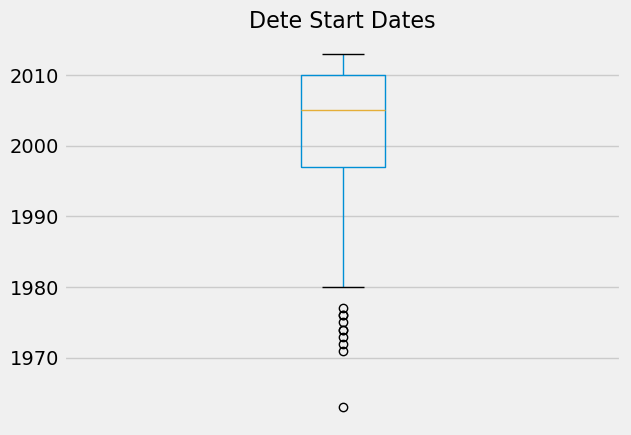

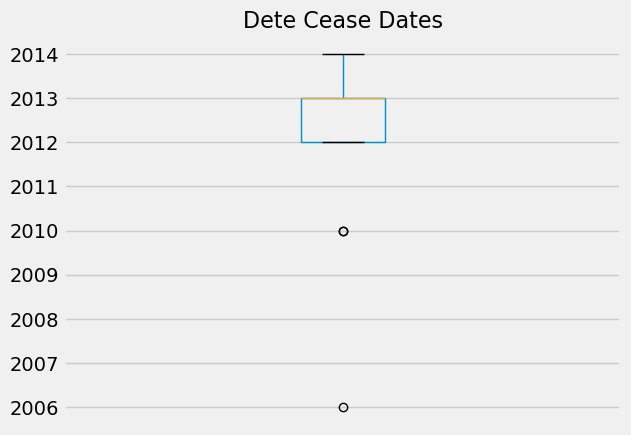

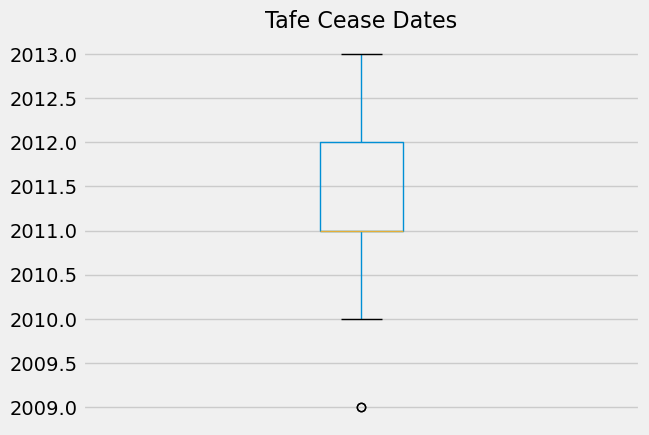

In [279]:
%matplotlib inline
dete_resignations.boxplot(column='dete_start_date')
plt.title("Dete Start Dates", fontsize=16)
plt.xticks([])
plt.show()
dete_resignations.boxplot(column='cease_date')
plt.title("Dete Cease Dates",fontsize=16)
plt.xticks([])
plt.show()
tafe_resignations.boxplot(column='cease_date')
plt.title("Tafe Cease Dates",fontsize=16)
plt.xticks([])
plt.show()

It seems alot of the start dates according to the Dete dataset are after 1980 with a cease date mostly between 2012 and 2014.
The Tafe dataset shows alot of cease dates between 2010 and 2013. 

### Creating a New Column (institute_service):

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.
Tafe_resignations dataframe already contains a "service" column, which we renamed to institute_service. In order to analyze both surveys together, we'll have to create a corresponding institute_service column in dete_resignations. As dete dataframe
does not have a length of time spent at the employer. 

In [280]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
2.0     14
9.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
17.0     6
10.0     6
22.0     6
12.0     6
14.0     6
18.0     5
16.0     5
24.0     4
23.0     4
11.0     4
32.0     3
39.0     3
21.0     3
19.0     3
25.0     2
28.0     2
26.0     2
30.0     2
36.0     2
33.0     1
35.0     1
49.0     1
38.0     1
41.0     1
27.0     1
42.0     1
29.0     1
34.0     1
31.0     1
Name: institute_service, dtype: int64

### Identifying Dissatisfied Employees:

One of the main questions of the project is to identify if employees are leaving due to some dissatification with their employer. Each dataset has columns that correspond to reasons for resigning. 

**In dete_resignations I will use the following reasons for dissatisfied employees:** 

'interpersonal_conflicts','job_dissatisfaction', 'dissatisfaction_with_the_department',

'physical_work_environment', 'lack_of_recognition','lack_of_job_security', 'work_location', 

'employment_conditions','work_life_balance', 'workload',
        

**In tafe_resignations I will use the following reasons for dissatified employees:**

 'Contributing Factors. Dissatisfaction',
 
 'Contributing Factors. Job Dissatisfaction',
 
 'Contributing Factors. Interpersonal Conflict',
 
<br>
I will use these columns to create a new column called **dissatisfied** which will be a boolean of True, False, Nan. 

In [281]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service'],
      dtype='object')

In [282]:
tafe_resignations.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [283]:
tafe_resignations['Contributing Factors. Dissatisfaction'].unique()

array(['-', 'Contributing Factors. Dissatisfaction ', nan], dtype=object)

In [284]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].unique()

array(['-', 'Job Dissatisfaction', nan], dtype=object)

In [285]:
tafe_resignations['Contributing Factors. Interpersonal Conflict'].unique()

array(['-', nan, 'Interpersonal Conflict'], dtype=object)

In [286]:
print (dete_resignations['interpersonal_conflicts'].unique())
print ()
print(dete_resignations['job_dissatisfaction'].unique())
print ()
print(dete_resignations['workload'].unique())

[False  True]

[False  True]

[False  True]


In [287]:
def update_vals(value):
    if pd.isnull(value)==True:
        return np.nan
    elif value == '-':
        return False 
    else: 
        return True 
     
tafe_resignations['dissatisfied']= tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction','Contributing Factors. Interpersonal Conflict']] .applymap(update_vals).any(axis=1, skipna=False)
print(tafe_resignations['dissatisfied'].value_counts())
print(tafe_resignations['dissatisfied'].unique())

dete_resignations['dissatisfied'] = dete_resignations[['interpersonal_conflicts','job_dissatisfaction', 'dissatisfaction_with_the_department',

'physical_work_environment', 'lack_of_recognition','lack_of_job_security', 'work_location',

'employment_conditions','work_life_balance', 'workload',]].any(axis=1, skipna=False)

print ()
print (dete_resignations['dissatisfied'].value_counts())
print (dete_resignations['dissatisfied'].unique())

False    235
True     105
Name: dissatisfied, dtype: int64
[False  True]

False    157
True     154
Name: dissatisfied, dtype: int64
[False  True]


In [288]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

### Combining the Datasets: 

Ill create a column identifying each row from its source dataset with a column called **institute**. 
Then I will combine the datasets and do some exploration to see how it came out. 

In [289]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [290]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up],axis=0, ignore_index=True)

print (combined.shape)
print ()
print (combined.columns)
print ()
print (combined.head())

(651, 53)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service', 'dissatisfied',
       'institute', 'Institute', 'WorkArea',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employmen

In [291]:
print (combined['age'].value_counts())
print (combined['cease_date'].value_counts())

41-45    93
46-50    81
56-75    78
36-40    73
51-55    71
26-30    67
21-25    62
31-35    61
16-20    10
Name: age, dtype: int64
2012.0    223
2013.0    201
2011.0    116
2010.0     70
2014.0     22
2009.0      2
2006.0      1
Name: cease_date, dtype: int64


In [292]:
combined_updated= combined.dropna(thresh=500, axis=1)
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       651 non-null    bool   
 9   institute          651 non-null    object 
dtypes: bool(1), float64(2), object(7)
memory usage: 46.5+ KB


I had a bunch of null data from my original exploration so I decided to clean the dataset to keep the non null that are over 500. 

### Cleaning the Service Column:

Now I will clean the service column and categorize the institute_service column into these categories: 

New: Less than 3 years at a company

Experienced: 3-6 years at a company

Established: 7-10 years at a company

Veteran: 11 or more years at a company

The reasoning behind it is the service column has exact years and ranges. I want to make it more uniform for analysis. Since we have ranges and exact years the best method would be to use ranges and label them by years spent at the employer.  

In [293]:
print(combined_updated['institute_service'].value_counts())
print()
print(combined_updated['institute_service'].shape)

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2
49.0                   1


In [294]:
combined_updated['institute_service_up'] = (combined_updated['institute_service'].astype('str').str.extract(r"(\d+)").astype('float'))
print(combined_updated['institute_service_up'].value_counts())
print()
print(combined_updated['institute_service_up'].shape)

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
22.0      6
14.0      6
12.0      6
18.0      5
16.0      5
24.0      4
23.0      4
21.0      3
19.0      3
39.0      3
32.0      3
25.0      2
28.0      2
26.0      2
36.0      2
30.0      2
34.0      1
27.0      1
29.0      1
42.0      1
33.0      1
41.0      1
35.0      1
49.0      1
38.0      1
31.0      1
Name: institute_service_up, dtype: int64

(651,)


C:\Users\marko\AppData\Local\Temp\ipykernel_78696\2285758770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['institute_service_up'] = (combined_updated['institute_service'].astype('str').str.extract(r"(\d+)").astype('float'))


In [295]:
def update_years(value):
    if pd.isnull(value)==True:
        return np.nan
    elif (value < 3):
        return 'New' 
    elif (value >= 3 and value < 7): 
        return 'Experienced'
    elif(value >=7 and value < 11):
        return 'Established'
    elif(value >= 11):
        return 'Veteran'

combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(update_years)
print (combined_updated['service_cat'].value_counts())

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64


C:\Users\marko\AppData\Local\Temp\ipykernel_78696\152098440.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(update_years)


### Performing Analysis:

Now that I finally have the dataset in good shape some analysis can be performed on the data. 

In [296]:
print (combined_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'position', 'employment_status',
       'gender', 'age', 'institute_service', 'dissatisfied', 'institute',
       'institute_service_up', 'service_cat'],
      dtype='object')


In [297]:
print (combined_updated['dissatisfied'].value_counts(dropna=False))

False    392
True     259
Name: dissatisfied, dtype: int64


In [298]:
combined_pivot= pd.pivot_table(combined_updated, values= 'dissatisfied', index='service_cat') 
print (combined_pivot)

             dissatisfied
service_cat              
Established      0.516129
Experienced      0.354651
New              0.321244
Veteran          0.507353


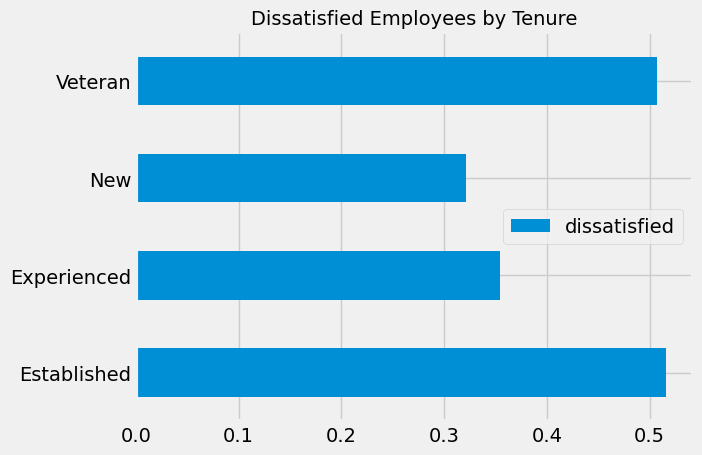

In [300]:
combined_pivot.plot(kind='barh')
plt.ylabel('')
plt.title("Dissatisfied Employees by Tenure", fontsize=14)
plt.show()

If we look at it as percentages Veterans and Established employees have a 50% chance of being dissatisifed with their employer. 
According to the graph it seems to increase over the years. 

### Resignations by age:



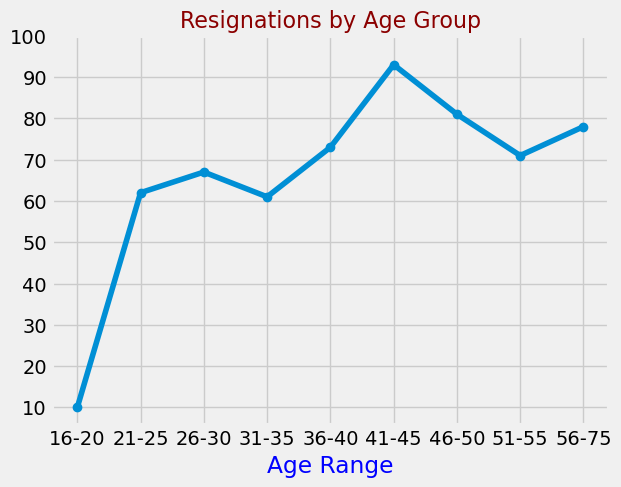

In [336]:
plt.plot(combined_updated['age'].value_counts().sort_index(), marker='o')
plt.yticks(np.arange(10, 110, 10))
plt.xlabel('Age Range', color='blue')
plt.title('Resignations by Age Group', fontsize=16, color='darkred')
plt.show()

In [337]:
print(combined_updated['age'].value_counts(dropna=False))

41-45    93
46-50    81
56-75    78
36-40    73
51-55    71
26-30    67
21-25    62
31-35    61
NaN      55
16-20    10
Name: age, dtype: int64


### Notes: 

The Age range with the most resignations is 41-45. The age range of 40-50 seems to be the largest age range of resignations. Lets see how the Age ranges compare to dissatisifcation. 

* How many people in each age group resgined due to some kind of dissatisfaction?

* How many people in each career stage resigned due to some kind of dissatisfaction?

* Instead of analyzing the survey results together, analyze each survey separately. Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?

In [304]:
truea_dissatisfied= combined_updated['age'] == '16-20' 
resultsa=combined_updated.loc[truea_dissatisfied, 'dissatisfied']
print(resultsa.value_counts())

trueb_dissatisfied= combined_updated['age'] == '21-25' 
resultsb=combined_updated.loc[trueb_dissatisfied, 'dissatisfied']
print(resultsb.value_counts())

truec_dissatisfied= combined_updated['age'] == '26-30' 
resultsc=combined_updated.loc[truec_dissatisfied, 'dissatisfied']
print(resultsc.value_counts())

trued_dissatisfied= combined_updated['age'] == '31-35' 
resultsd=combined_updated.loc[trued_dissatisfied, 'dissatisfied']
print(resultsd.value_counts())

truee_dissatisfied= combined_updated['age'] == '36-40' 
resultse=combined_updated.loc[truee_dissatisfied, 'dissatisfied']
print(resultse.value_counts())

truef_dissatisfied= combined_updated['age'] == '41-45' 
resultsf=combined_updated.loc[truef_dissatisfied, 'dissatisfied']
print(resultsf.value_counts())

trueg_dissatisfied= combined_updated['age'] == '46-50' 
resultsg=combined_updated.loc[trueg_dissatisfied, 'dissatisfied']
print(resultsg.value_counts())

trueh_dissatisfied= combined_updated['age'] == '51-55' 
resultsh=combined_updated.loc[trueh_dissatisfied, 'dissatisfied']
print(resultsh.value_counts())

truei_dissatisfied= combined_updated['age'] == '56-75' 
resultsi=combined_updated.loc[truei_dissatisfied, 'dissatisfied']
print(resultsi.value_counts())

False    7
True     3
Name: dissatisfied, dtype: int64
False    43
True     19
Name: dissatisfied, dtype: int64
False    38
True     29
Name: dissatisfied, dtype: int64
False    37
True     24
Name: dissatisfied, dtype: int64
False    46
True     27
Name: dissatisfied, dtype: int64
False    57
True     36
Name: dissatisfied, dtype: int64
False    49
True     32
Name: dissatisfied, dtype: int64
False    38
True     33
Name: dissatisfied, dtype: int64
False    45
True     33
Name: dissatisfied, dtype: int64


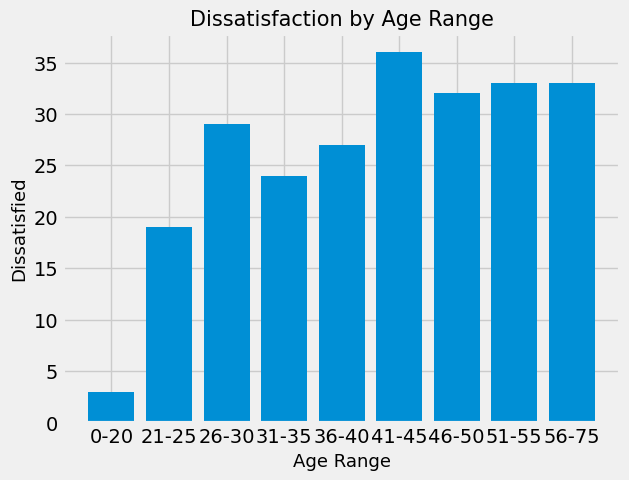

In [348]:
x = ['0-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-75']
y = [3,19,29,24,27,36,32,33,33]
plt.bar(x,y)
plt.xlabel('Age Range', fontsize=13)
plt.ylabel('Dissatisfied', fontsize=13)
plt.title('Dissatisfaction by Age Range', fontsize=15)
plt.show()

#### Notes:

The most dissatisfied seem to be the age range of 41-45. 
The age range of 41-75 are more dissatified then people under the age of 40.

### Lets see how dissatisfied vs not dissatisfied stack up against each other. 

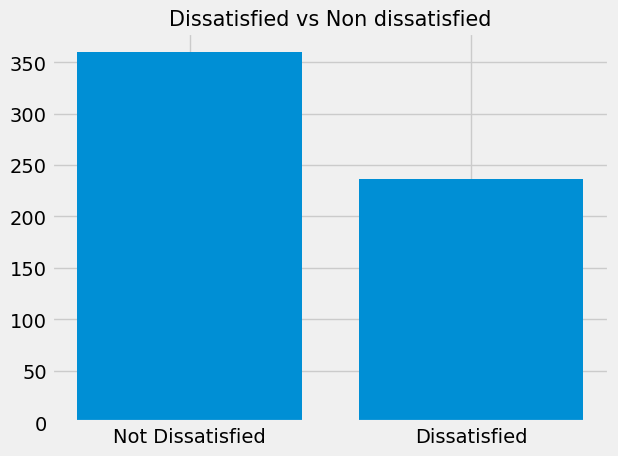

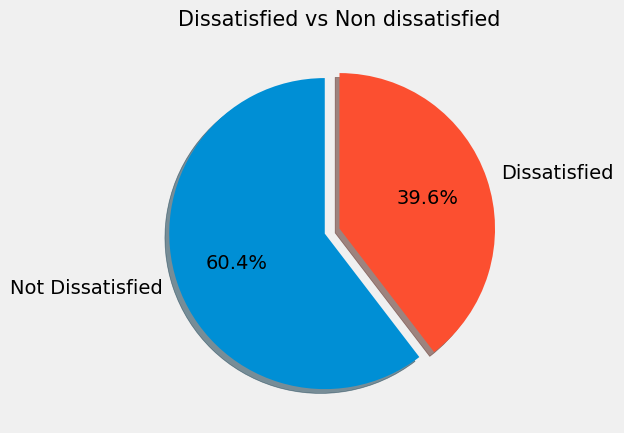

In [393]:
not_dissatisfied = 7+43+38+37+46+57+49+38+45
dissatisfied = 3+19+29+24+27+36+32+33+33

the_percentage_a = ( dissatisfied/(not_dissatisfied + dissatisfied)*100)
the_percentage_b = ( not_dissatisfied/(not_dissatisfied + dissatisfied )*100)

dis_per = pd.DataFrame({'percentage': [the_percentage_b,the_percentage_a]},index=['Not Dissatisfied','Dissatisfied'])

x = ['Not Dissatisfied', 'Dissatisfied']
y= [not_dissatisfied, dissatisfied]
plt.bar(x,y)
plt.title('Dissatisfied vs Non dissatisfied', fontsize=15)
plt.show()

dis_per.plot.pie(legend= None, subplots=True, explode=(0.1,0), shadow=True,  startangle=90, autopct='%1.1f%%')
plt.xticks(rotation=0)
plt.title('Dissatisfied vs Non dissatisfied', fontsize=15)
plt.ylabel('')
plt.show()


### Notes:

As we can see about 40% of people that resign from their job are dissatisfied. 
This is expected that a large portion of people that leave an employer would be dissatisfied. 
The other 60% are leaving for other reasons and possibly other oppurtunites. 

In [307]:
print(combined_updated.columns)
print(combined_updated['service_cat'].value_counts())
print(combined_updated['dissatisfied'].value_counts())


Index(['id', 'separationtype', 'cease_date', 'position', 'employment_status',
       'gender', 'age', 'institute_service', 'dissatisfied', 'institute',
       'institute_service_up', 'service_cat'],
      dtype='object')
New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64
False    392
True     259
Name: dissatisfied, dtype: int64


In [396]:
newa_dissatisfied= combined_updated['service_cat'] == 'New' 
resultsna=combined_updated.loc[newa_dissatisfied, 'dissatisfied']
print(resultsna.value_counts())

newb_dissatisfied= combined_updated['service_cat'] == 'Experienced' 
resultsnb=combined_updated.loc[newb_dissatisfied, 'dissatisfied']
print(resultsnb.value_counts())

newc_dissatisfied= combined_updated['service_cat'] == 'Established' 
resultsnc=combined_updated.loc[newc_dissatisfied, 'dissatisfied']
print(resultsnc.value_counts())

newd_dissatisfied= combined_updated['service_cat'] == 'Veteran' 
resultsnd=combined_updated.loc[newd_dissatisfied, 'dissatisfied']
print(resultsnd.value_counts())

False    131
True      62
Name: dissatisfied, dtype: int64
False    111
True      61
Name: dissatisfied, dtype: int64
True     32
False    30
Name: dissatisfied, dtype: int64
True     69
False    67
Name: dissatisfied, dtype: int64


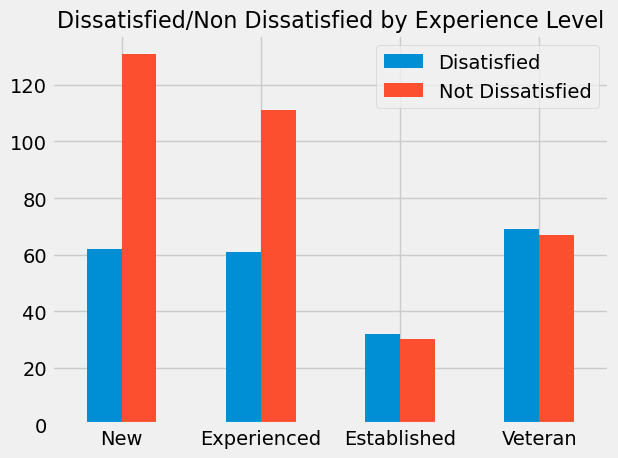

In [414]:
diss_t = pd.DataFrame({'Disatisfied':[62,61,32,69],'Not Dissatisfied':[131,111,30,67]}, 
                      index=['New', 'Experienced', 'Established','Veteran'] )

diss_t.plot.bar()
plt.xticks(rotation=0)
plt.title('Dissatisfied/Non Dissatisfied by Experience Level', fontsize=16)
plt.show()

New: Less than 3 years at a company

Experienced: 3-6 years at a company

Established: 7-10 years at a company

Veteran: 11 or more years at a company

As we can see above dissatisfaction tends to increase over time. 

### Conclusion: 

What we have gathered in this project: 

* The age range of 40-50 seem to be most dissatisfied with their employer
* Dissatisfaction increases with tenure on the job. 
* Dissatifcation increases based on experience. 
* Overall 60% of people that resign are not dissatisfied with their employer